In [28]:
import os
os.chdir('/Users/asherlantz/Desktop/physics/FairSampling')
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import tfim_sk_infd.services.entropy_service as tfe
import json

DB_PATH = 'database/fair_sampling.db'

In [29]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT
	seed,
	od_variance,
	post_anneal_od_variance,
	qfi_fair_sampling,
	qfi_post_anneal
FROM
	instances_N16
WHERE degeneracy > 2;

"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [30]:
df

,seed,od_variance,post_anneal_od_variance,qfi_fair_sampling,qfi_post_anneal
0,6,0.013889,1.393923e-02,0.013889,0.014650
1,9,0.015625,1.561641e-02,0.015625,0.015378
2,10,0.015625,1.562127e-02,0.015625,0.015615
3,11,0.015625,1.560984e-02,0.015625,0.015206
4,13,0.062500,1.019535e-08,0.062500,0.000012
...,...,...,...,...,...
640,1987,0.013889,1.402990e-02,0.013889,0.015022
641,1992,0.250000,3.273035e-08,0.250000,0.000090
642,1993,0.062500,1.202869e-06,0.062500,0.000018
643,1997,0.070400,1.790114e-02,0.085000,0.021043


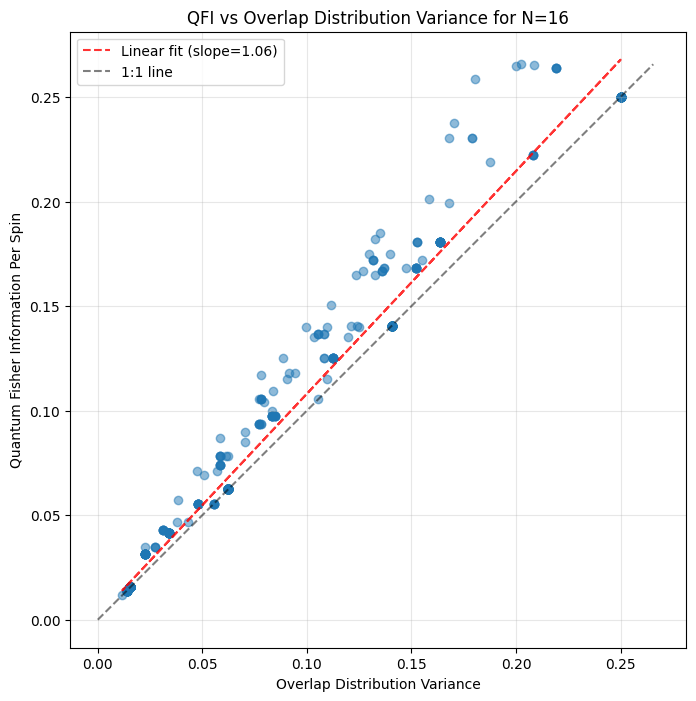

In [31]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['od_variance'], df['qfi_fair_sampling'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['od_variance'], df['qfi_fair_sampling'], 1)
p = np.poly1d(z)
plt.plot(df['od_variance'], p(df['od_variance']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['od_variance'].max(), df['qfi_fair_sampling'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('Overlap Distribution Variance')
plt.ylabel('Quantum Fisher Information Per Spin')
plt.title('QFI vs Overlap Distribution Variance for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

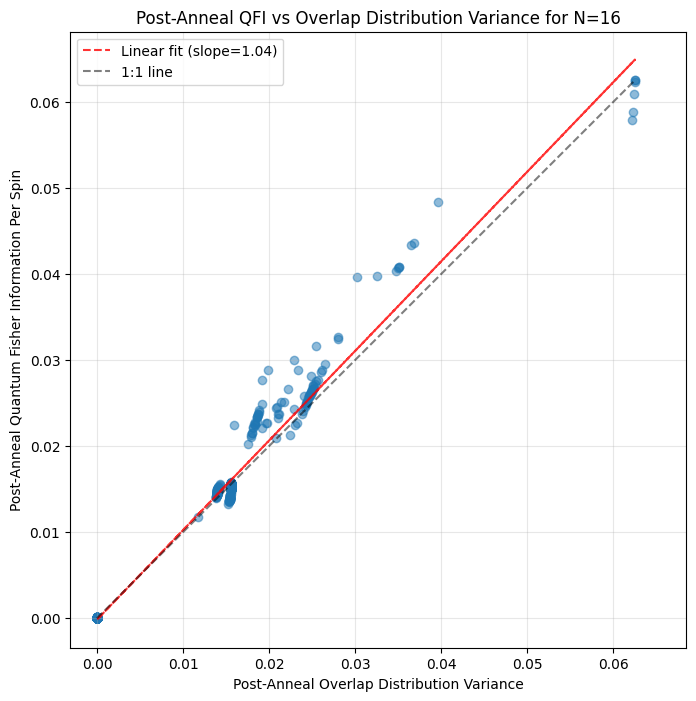

In [17]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['post_anneal_od_variance'], df['qfi_post_anneal'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['post_anneal_od_variance'], df['qfi_post_anneal'] , 1)
p = np.poly1d(z)
plt.plot(df['post_anneal_od_variance'], p(df['post_anneal_od_variance']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['post_anneal_od_variance'].max(), df['qfi_post_anneal'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('Post-Anneal Overlap Distribution Variance')
plt.ylabel('Post-Anneal Quantum Fisher Information Per Spin')
plt.title('Post-Anneal QFI vs Overlap Distribution Variance for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

In [33]:
# Filter for instances where post_anneal_od_variance > qfi_post_anneal/16
filtered_df = df[df['post_anneal_od_variance'] > df['qfi_post_anneal']]


filtered_df2 = filtered_df[filtered_df['post_anneal_od_variance'] > 0.06][['seed','post_anneal_od_variance', 'qfi_post_anneal']]
filtered_df2

,seed,post_anneal_od_variance,qfi_post_anneal
201,646,0.062266,0.058774
219,709,0.062144,0.057841
233,773,0.062491,0.062295
579,1766,0.062449,0.060868
